In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')
df.head(30)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df = df.rename(columns={
    'race/ethnicity': "race",
    'parental level of education ': 'parent_edu',
    'test preparation course':'course_completed',
    'math score': 'maths',
    'reading score':"reading",
    'writing score': 'writing'
})

In [7]:
for i in df.columns:
    print(i)

gender
race
parental level of education
lunch
course_completed
maths
reading
writing


<Axes: xlabel='maths', ylabel='Count'>

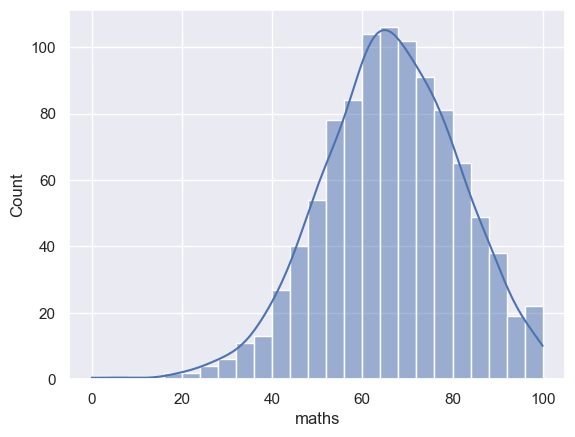

In [8]:
sns.set_theme(style = 'darkgrid')
sns.histplot(df['maths'],kde= True, bins = 25)

In [9]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    discrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate

<Axes: xlabel='reading', ylabel='Count'>

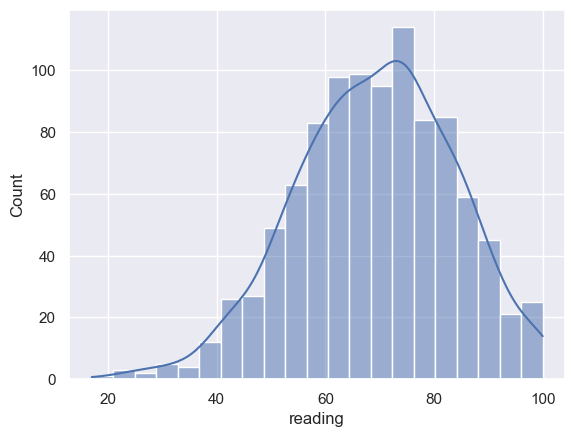

In [10]:
sns.histplot(df.reading, kde= True)

<Axes: xlabel='writing', ylabel='Count'>

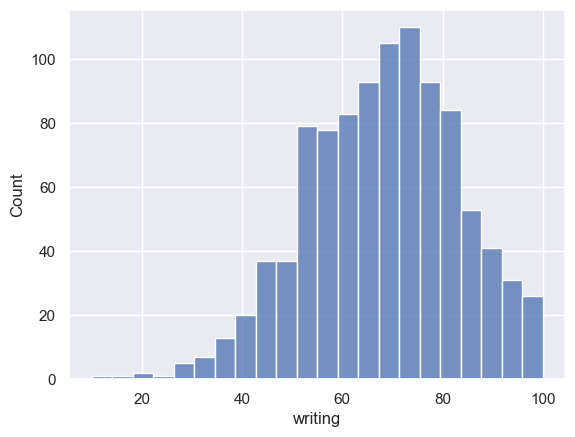

In [11]:
sns.histplot(df.writing)

In [12]:
def remove_outliers(feature):
    global df
    q3, q1 = np.percentile(df[feature], [75, 25])
    
    iqr = q3-q1
    
    df = df[ (df[feature] >= q1 - 1.5 * iqr) & (df[feature] <= q3 + 1.5 * iqr) ]

In [13]:
remove_outliers("writing")
remove_outliers("reading")
remove_outliers("maths")

<Axes: xlabel='maths', ylabel='Count'>

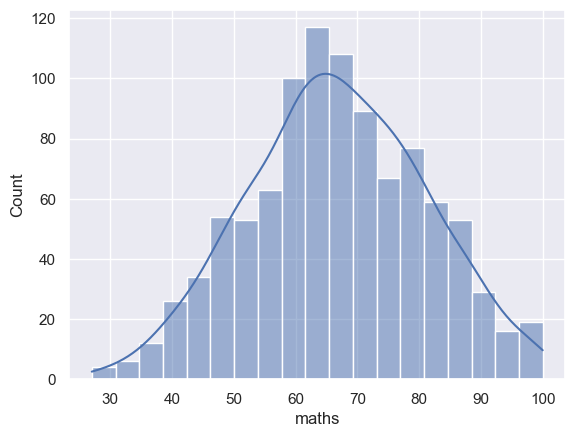

In [15]:
sns.histplot(df.maths, kde= True)

<Axes: >

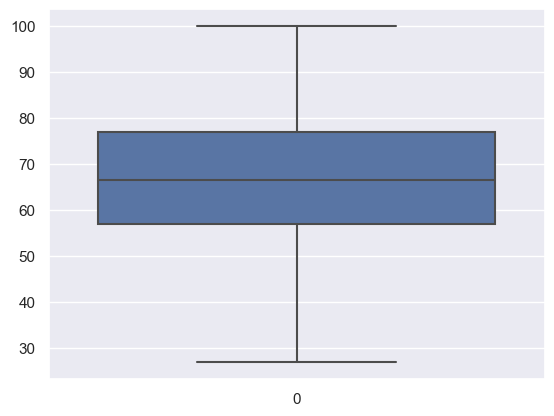

In [17]:
sns.boxplot(df.maths)

In [19]:
df.maths.mean()

66.6947261663286

In [20]:
print(df['gender'].dtypes)

object


In [21]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

def encode_categoricaldata(feature):
    df[feature] = labelEncoder.fit_transform(df[feature])
    
    
for i in df.columns:
    if(df[i].dtypes == 'object'):
        encode_categoricaldata(i)

    

In [22]:
df.dtypes

gender                         int64
race                           int64
parental level of education    int64
lunch                          int64
course_completed               int64
maths                          int64
reading                        int64
writing                        int64
dtype: object

In [23]:
df.head(10)

,gender,race,parental level of education,lunch,course_completed,maths,reading,writing
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
5,0,1,0,1,1,71,83,78
6,0,1,4,1,0,88,95,92
7,1,1,4,0,1,40,43,39
8,1,3,2,0,0,64,64,67
9,0,1,2,0,1,38,60,50


In [24]:
def z_score(feature):
    df[feature] = (df[feature] - df[feature].mean())/df[feature].std()

In [25]:
z_score('reading')
z_score('maths')
z_score('writing')

In [26]:
df.head()

,gender,race,parental level of education,lunch,course_completed,maths,reading,writing
0,0,1,1,1,1,0.369943,0.163678,0.370964
1,0,2,4,1,0,0.160750,1.457644,1.341360
2,0,1,3,1,1,1.625105,1.817079,1.687930
3,1,0,0,0,1,-1.373337,-0.914627,-1.708457
4,1,2,4,1,1,0.648868,0.595000,0.440278


<Axes: xlabel='writing', ylabel='Count'>

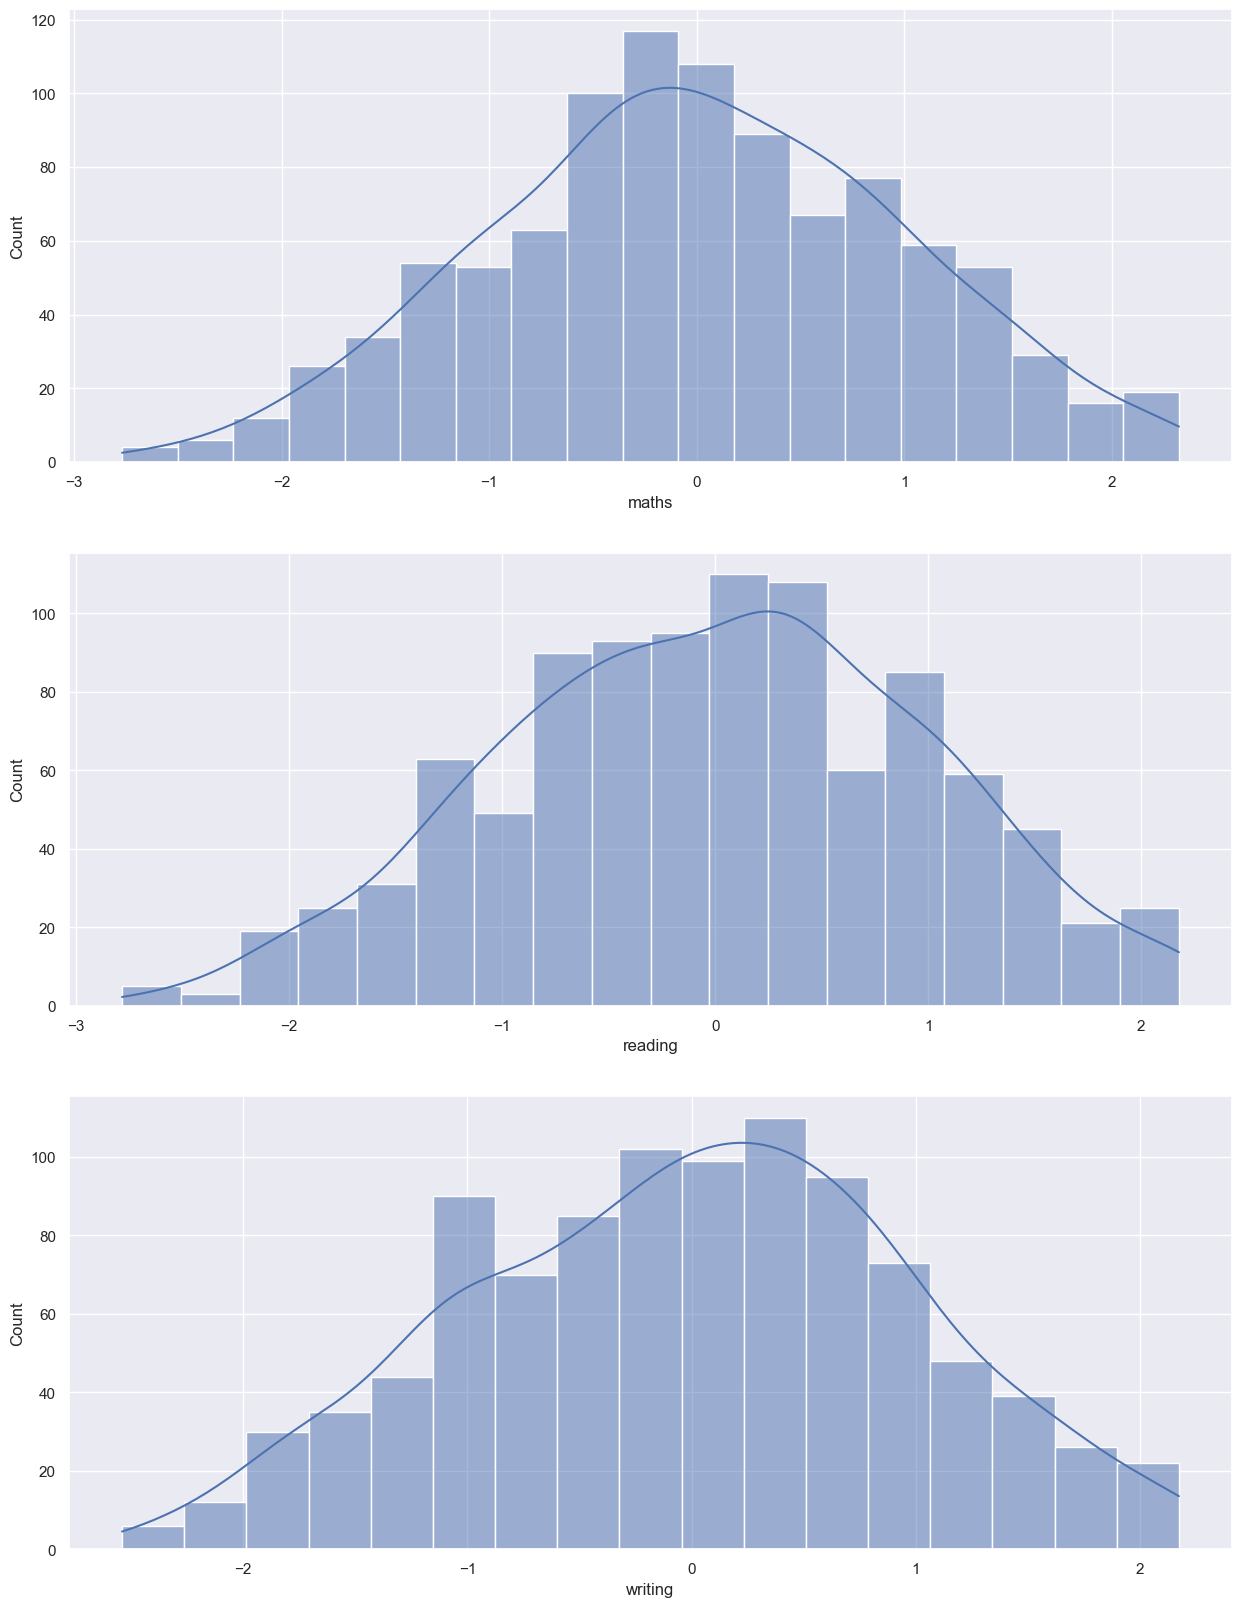

In [32]:
plt.figure(figsize=(15,20))
plt.subplot(3,1,1)
sns.histplot(df.maths, kde= True)
plt.subplot(3,1,2)
sns.histplot(df.reading, kde= True)
plt.subplot(3,1,3)
sns.histplot(df.writing, kde= True)

<Axes: >

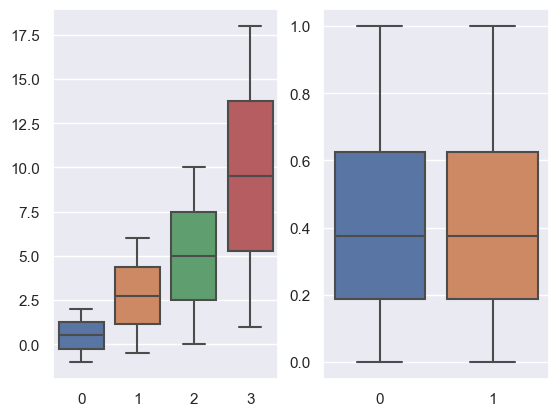

In [35]:
from sklearn.preprocessing import MinMaxScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)
plt. subplot(1,2,1)
sns.boxplot(data)
plt.subplot(1,2,2)
sns.boxplot(scaled_data)